In [16]:
from os.path import expanduser as eu
import time
import scipy.constants as scicon
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Load MPL style file
notLoaded = True
if notLoaded:
    mpl.style.use(eu('~/Git/40m/pygwinc/CIT40m/style40.mpl'))
    notLoaded = False

### Data reading code to run
Deactivate conda completely.

```Python
conda deactivate
fromFBread --start 1253692818 --stop 1253779218 -c C3:PSL-PRECAV_BEATNOTE_FREQ  C3:PSL-NCAV_FSS_SLOWOUT C3:PSL-SCAV_FSS_SLOWOUT C3:PSL-HEATER_SHIELD_DIFF_PID_EN  C3:PSL-SCAV_FSS_RAMP_EN  C3:PSL-NCAV_FSS_RAMP_EN -d 16 -f BeatnoteLongTimeSeriesSep28_2019
                        
fromFBread --start 1253692818 --stop 1253779218 -c C3:PSL-TEMP_VACCAN_INLOOP  C3:PSL-TEMP_VACCAN_OOL  C3:PSL-HEATER_CAN_VOUT -d 16 -f VacCanLongTimeSeriesSep28_2019
```

In [8]:
with open('BeatnoteLongTimeSeriesSep28_2019_09-09-2020_144246.txt') as f:
    header = f.readline()
print(header)
with open('VacCanLongTimeSeriesSep28_2019_09-09-2020_152416.txt') as f:
    header = f.readline()
print(header)

# TimeSeries(s)  C3:PSL-PRECAV_BEATNOTE_FREQ  C3:PSL-NCAV_FSS_SLOWOUT  C3:PSL-SCAV_FSS_SLOWOUT  C3:PSL-HEATER_SHIELD_DIFF_PID_EN  C3:PSL-SCAV_FSS_RAMP_EN  C3:PSL-NCAV_FSS_RAMP_EN  C3:PSL-PRECAV_BEATNOTE_FREQ_STD  C3:PSL-NCAV_FSS_SLOWOUT_STD  C3:PSL-SCAV_FSS_SLOWOUT_STD  C3:PSL-HEATER_SHIELD_DIFF_PID_EN_STD  C3:PSL-SCAV_FSS_RAMP_EN_STD  C3:PSL-NCAV_FSS_RAMP_EN_STD  

# TimeSeries(s)  C3:PSL-TEMP_VACCAN_INLOOP  C3:PSL-TEMP_VACCAN_OOL  C3:PSL-HEATER_CAN_VOUT  C3:PSL-TEMP_VACCAN_INLOOP_STD  C3:PSL-TEMP_VACCAN_OOL_STD  C3:PSL-HEATER_CAN_VOUT_STD  



In [9]:
data = np.loadtxt('BeatnoteLongTimeSeriesSep28_2019_09-09-2020_144246.txt')
candata = np.loadtxt('VacCanLongTimeSeriesSep28_2019_09-09-2020_152416.txt')

In [31]:
def plotBeatNote(fullData, startInd=0, stopInd=-1, averaged_Over=None):
    data = fullData[startInd:stopInd,:]
    indToKeep = []
    refTimeString = time.strftime("%b %d %Y %H:%M:%S", time.gmtime(data[0,0] + 315939582))
    titleString = (time.strftime("Beatnote from %b %d %Y %H:%M:%S",
                                time.gmtime(data[0,0] + 315939582))
                   + time.strftime(" to %b %d %Y %H:%M:%S",
                                time.gmtime(data[-1,0] + 315939582)))
    
    ts = data[:,0] - data[0,0]
    x_axisLable = 's'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'min'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'hrs'
    
    if ts[-1]-ts[0]>5*24:
        ts = ts/24
        x_axisLable = 'days'
    
    fig = plt.figure(figsize=[16,12])
    ax = fig.gca()
    
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = (data[::fac,1] - 27.34)*1e3
        toPlotFloor = (data[::fac,1] - data[::fac,7] - 27.34)*1e3
        toPlotCeil = (data[::fac,1] + data[::fac,7] - 27.34)*1e3
    else:
        toPlotx = ts
        toPloty = (data[:,1] - 27.34)*1e3
        toPlotFloor = (data[:,1] - data[:,7] - 27.34)*1e3
        toPlotCeil = (data[:,1] + data[:,7] - 27.34)*1e3
    
    if averaged_Over is not None:
        labelString = 'Mean Beatnote Frequency averaged over ' + averaged_Over
        ax.fill_between(toPlotx, toPlotFloor,toPlotCeil,
                    alpha =0.3, color='tab:blue',
                    label = 'Standard deviation of beatnote frequency')
    else:
        labelString = 'Beatnote Frequency'
        
    ax.plot(toPlotx, toPloty, c = 'tab:blue', label = labelString)
    ax.set_xlabel('Time ['+ x_axisLable + '] from ' + refTimeString)
    ax.set_ylabel('Pre-cavity Beatnote Frequency from 27.34 MHz [kHz]')
    ax.grid(linestyle='solid', which='major', alpha=0.75)
    ax.grid(linestyle='dashed', which='minor', alpha=0.25)
    ax.legend()
    ax.set_title(titleString)
    return fig

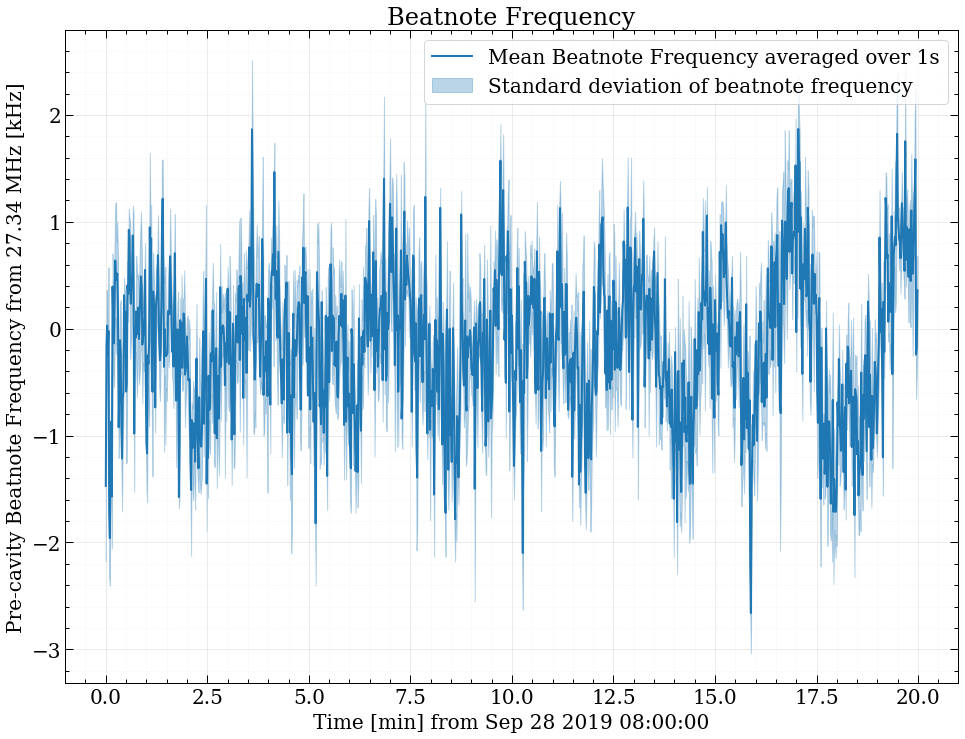

In [32]:
fig = plotBeatNote(data, startInd=7*60*60, stopInd=7*60*60+ 20*60, averaged_Over='1s');
ax = fig.gca()
ax.set_title('Beatnote Frequency')
fig.savefig('../BeatnoteFrequencyTimeSeries.pdf', bbox_inches='tight')

In [51]:
def plotCavTemp(fullData, startInd=0, stopInd=-1, averaged_Over=None):
    data = fullData[startInd:stopInd,:]
    indToKeep = []
    refTimeString = time.strftime("%b %d %Y %H:%M:%S", time.gmtime(data[0,0] + 315939582))
    titleString = (time.strftime("Cavity Temperatures from %b %d %Y %H:%M:%S",
                                time.gmtime(data[0,0] + 315939582))
                   + time.strftime(" to %b %d %Y %H:%M:%S",
                                time.gmtime(data[-1,0] + 315939582)))
    
    ts = data[:,0] - data[0,0]
    x_axisLable = 's'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'min'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'hrs'
    
    if ts[-1]-ts[0]>5*24:
        ts = ts/24
        x_axisLable = 'days'
    
    fig, ax = plt.subplots(figsize=[16,12])
    '''
    fig.subplots_adjust(right=0.75)
    
    par3 = ax.twinx()
    # Having been created by twinx, par3 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par3)
    # Second, show the right spine
    par3.spines["right"].set_visible(True)
    '''
    
    #colorBadRegion(data, ts, 4, ax)
    #colorBadRegion(data, ts, 5, ax)
    #colorBadRegion(data, ts, 6, ax)
    '''
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = data[::fac,1]
        toPlotFloor = data[::fac,1] - data[::fac,7]
        toPlotCeil = data[::fac,1] + data[::fac,7]
    else:
        toPlotx = ts
        toPloty = data[:,1]
        toPlotFloor = data[:,1] - data[:,7]
        toPlotCeil = data[:,1] + data[:,7]
    
    if averaged_Over is not None:
        labelString = 'Mean Beatnote Frequency averaged over ' + averaged_Over
        par3.fill_between(toPlotx, toPlotFloor,toPlotCeil,
                    alpha =0.3, color='c',
                    label = 'Standard deviation of beatnote frequency')
    else:
        labelString = 'Beatnote Frequency'
        
    BNF, = par3.plot(toPlotx, toPloty, c = 'c', label = labelString)
    par3.yaxis.label.set_color(BNF.get_color())
    tkw = dict(size=4, width=1.5)
    par3.tick_params(axis='y', colors=BNF.get_color(), **tkw)
    '''
    
    refInd = 1           # There is a bored hole in spacer
    CTE = 5.5e-7         # https://www.accuratus.com/fused.html
    SNPROvoltToFreq = 3.48e9 # Hz/V CTN:1948
    NNPROvoltToFreq = 3.64e9 # Hz/V CTN:1948
    lam = 1.064e-6      # m
    SvoltToCavTemp = 1e3 * SNPROvoltToFreq / ( - (CTE * (scicon.c / refInd / lam)))
    NvoltToCavTemp = 1e3 * NNPROvoltToFreq / ( - (CTE * (scicon.c / refInd / lam)))
    print('South Cavity Conversion Factor ',str(np.round(SvoltToCavTemp,3)),' mK/V')
    print('North Cavity Conversion Factor ',str(np.round(NvoltToCavTemp,3)),' mK/V')
    
    NCAVTemp = data[:,2]*NvoltToCavTemp + (0 - data[0, 2]* NvoltToCavTemp)
    SCAVTemp = data[:,3]*SvoltToCavTemp + (0 - data[0, 3]* SvoltToCavTemp)
    NCAVTempSTD = data[:,8]*NvoltToCavTemp
    SCAVTempSTD = data[:,9]*SvoltToCavTemp
    
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = SCAVTemp[::fac]
        toPlotFloor = SCAVTemp[::fac] - SCAVTempSTD[::fac]
        toPlotCeil = SCAVTemp[::fac] + SCAVTempSTD[::fac]
    else:
        toPlotx = ts
        toPloty = SCAVTemp
        toPlotFloor = SCAVTemp - SCAVTempSTD
        toPlotCeil = SCAVTemp + SCAVTempSTD
    
    if averaged_Over is not None:
        labelString = 'Mean South Cavity Temp. averaged over ' + averaged_Over
        ax.fill_between(toPlotx, toPlotFloor,toPlotCeil,
                    alpha =0.3, color='tab:orange',
                    label = 'Standard deviation of S Cavity Temp.')
    else:
        labelString = 'South Cavity Temp.'
    SCAVT, = ax.plot(toPlotx, toPloty, c = 'tab:orange', label = labelString)
    
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = NCAVTemp[::fac]
        toPlotFloor = NCAVTemp[::fac] - NCAVTempSTD[::fac]
        toPlotCeil = NCAVTemp[::fac] + NCAVTempSTD[::fac]
    else:
        toPlotx = ts
        toPloty = NCAVTemp
        toPlotFloor = NCAVTemp - NCAVTempSTD
        toPlotCeil = NCAVTemp + NCAVTempSTD
    
    if averaged_Over is not None:
        labelString = 'Mean North Cavity Temp. averaged over ' + averaged_Over
        ax.fill_between(toPlotx, toPlotFloor,toPlotCeil,
                    alpha =0.3, color='tab:blue',
                    label = 'Standard deviation of N Cavity Temp.')
    else:
        labelString = 'North Cavity Temp.'
    NCAVT, = ax.plot(toPlotx, toPloty, c = 'tab:blue', label = labelString)
    
    ax.set_xlabel('Time ['+ x_axisLable + '] from ' + refTimeString, fontsize=32)
    ax.set_ylabel('Cavity Temperature Fluctuations [$mK$]', fontsize=32)
    # par3.set_ylabel('Pre-cavity Beatnote Frequency [MHz]')
    ax.grid(linestyle='solid', which='major', alpha=0.75)
    ax.grid(linestyle='dashed', which='minor', alpha=0.25)
    lines = [SCAVT, NCAVT]#, BNF]
    ax.legend(lines, [l.get_label() for l in lines])
    ax.set_title(titleString)
    return fig
    

South Cavity Conversion Factor  -22456.263  mK/V
North Cavity Conversion Factor  -23488.735  mK/V


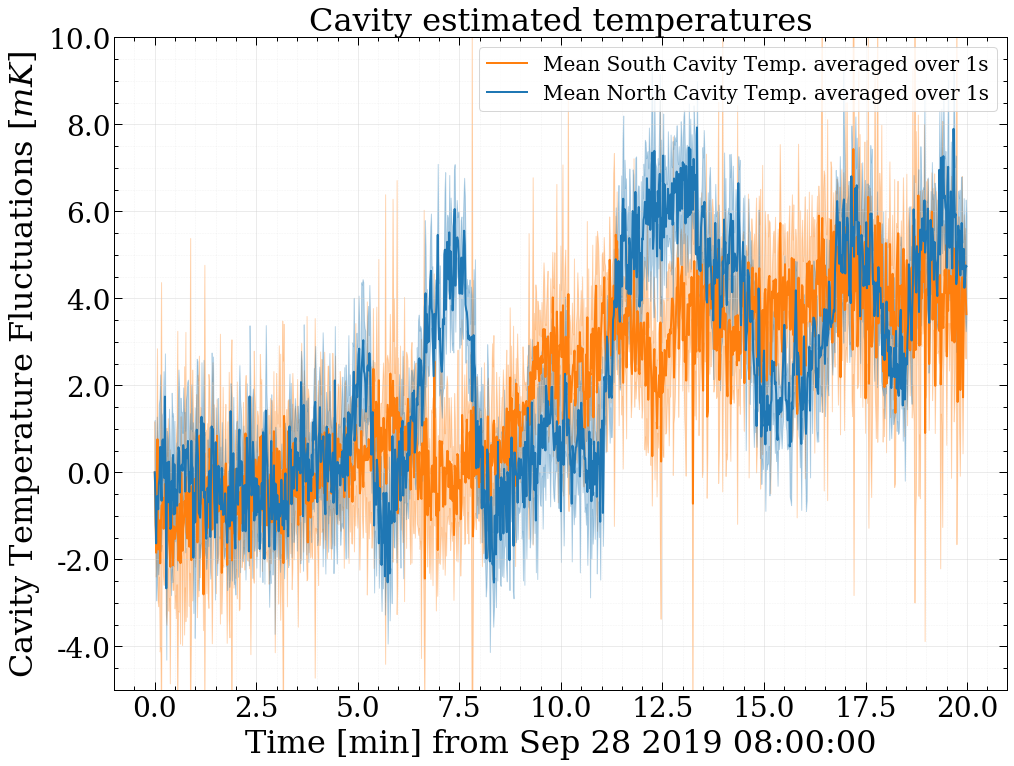

In [52]:
fig = plotCavTemp(data, startInd=7*60*60, stopInd=7*60*60+ 20*60, averaged_Over='1s');
ax = fig.gca()
ax.set_ylim([-5, 10])
ax.set_title('Cavity estimated temperatures', fontsize=32)
ax.set_xticklabels(ax.get_xticks(), fontsize= 28) 
ax.set_yticklabels(ax.get_yticks(), fontsize= 28) 
fig.savefig('../CavityTempTimeSeries.pdf', bbox_inches='tight')

In [54]:
def plotCanTemp(fullData, startInd=0, stopInd=-1, averaged_Over=None):
    data = fullData[startInd:stopInd,:]
    indToKeep = []
    refTimeString = time.strftime("%b %d %Y %H:%M:%S", time.gmtime(data[0,0] + 315939582))
    titleString = (time.strftime("Vacuum Can Out-of-loop Temperature from %b %d %Y %H:%M:%S",
                                time.gmtime(data[0,0] + 315939582))
                   + time.strftime(" to %b %d %Y %H:%M:%S",
                                time.gmtime(data[-1,0] + 315939582)))
    
    ts = data[:,0] - data[0,0]
    x_axisLable = 's'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'min'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'hrs'
    
    if ts[-1]-ts[0]>5*24:
        ts = ts/24
        x_axisLable = 'days'
    
    fig = plt.figure(figsize=[16,12])
    ax = fig.gca()
    
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = (data[::fac,2] - data[0,2])*1e3
        toPlotFloor = (data[::fac,2] - data[::fac,5] - data[0,2])*1e3
        toPlotCeil = (data[::fac,2] + data[::fac,5] - data[0,2])*1e3
    else:
        toPlotx = ts
        toPloty = (data[:,2] - data[0,2])*1e3
        toPlotFloor = (data[:,2] - data[:,5] - data[0,2])*1e3
        toPlotCeil = (data[:,2] + data[:,5] - data[0,2])*1e3
    
    if averaged_Over is not None:
        labelString = 'Mean Temp averaged over ' + averaged_Over
        ax.fill_between(toPlotx, toPlotFloor,toPlotCeil,
                    alpha =0.3, color='tab:blue',
                    label = 'Standard deviation')
        
    ax.plot(toPlotx, toPloty, c = 'tab:blue', label = labelString)
    ax.set_xlabel('Time ['+ x_axisLable + '] from ' + refTimeString, fontsize=32)
    ax.set_ylabel('Vacuum Can Temp. Fluctuations [mK]', fontsize=32)
    ax.grid(linestyle='solid', which='major', alpha=0.75)
    ax.grid(linestyle='dashed', which='minor', alpha=0.25)
    ax.set_title(titleString)
    ax.legend()
    return fig

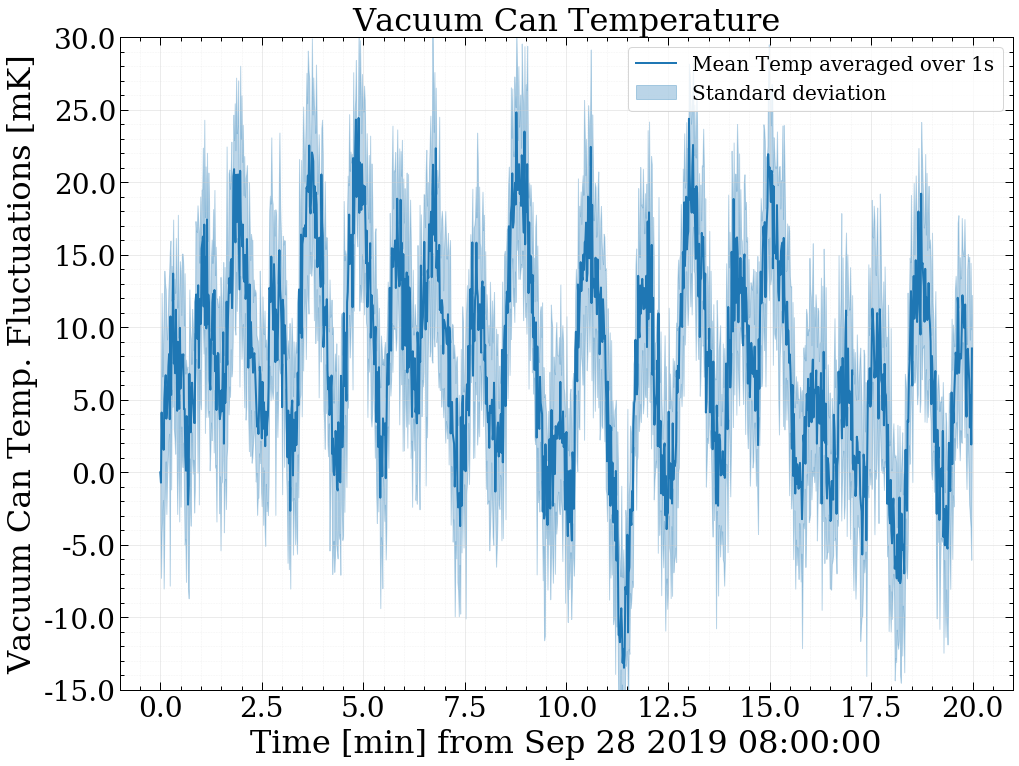

In [55]:
fig = plotCanTemp(candata,
            startInd=7*60*60, stopInd=7*60*60+ 20*60, averaged_Over='1s');
ax = fig.gca()
ax.set_ylim([-15, 30])
ax.set_title('Vacuum Can Temperature', fontsize=32)
ax.set_yticklabels(ax.get_yticks(), fontsize= 28) 
ax.set_xticklabels(ax.get_xticks(), fontsize= 28) 
fig.savefig('../CanTempTimeSeries.pdf', bbox_inches='tight')

In [ ]:
fig = plotBeatNote(data, averaged_Over='1s')
ax = fig.gca()
#ax.set_ylim((27.336,27.344))
figlist = [fig]

In [ ]:
fig = plotCavTemp(data, averaged_Over='1s')
ax = fig.gca()
#ax.set_ylim((27.336,27.344))
figlist += [fig]

In [ ]:
fig = plotCanTemp(data, averaged_Over='1s')
ax = fig.gca()
#ax.set_ylim((27.336,27.344))
figlist += [fig]